In [6]:
import scipy
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
import matplotlib 
import matplotlib.pyplot as plt

In [7]:
print(norm.cdf(-4))
print(norm.cdf(2))
print(norm.cdf(.1))

3.167124183311986e-05
0.9772498680518208
0.539827837277029


In [8]:
print(norm.ppf(0.84134))
print(norm.ppf(0.97725))
print(norm.ppf(2.85714286e-7))

0.9999803859660787
2.0000024438996027
-5.0006314347110346


In [58]:
#exponential function (linear)
d = expon.rvs(loc = 0, scale = 1, size = 100000)

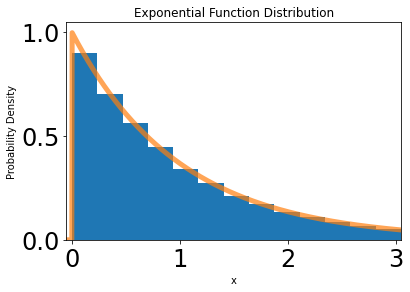

In [72]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-.05,3.05])
plt.title("Exponential Function Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
x = np.linspace(-.05,3.05,1000)
ax.plot(x,expon.pdf(x,loc = 0, scale = 1),linewidth = 5,alpha = 0.7)
plt.show()

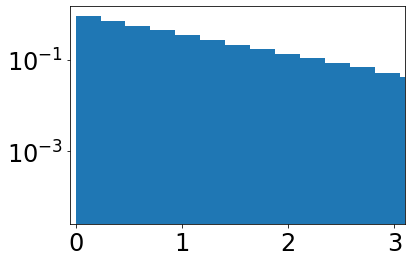

In [78]:
#log 
ax = plt.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-.05,3.1])
plt.show()

To find the probability that the background produced this signal, we want to use cdf() function. This will integrate from positive infinity to that
point. But it would make more sense to integrate from the point to infinity so a solution to this is to simply subtract the probability from 1.

In [80]:
f = expon.cdf(3.02)
print(1-f)

0.04880121836201301


Next we need to convert this to X(sigma) form with the ppf function. This will use the gaussian distribution since X(sigma) is of the form of the gaussian. The probability of background sending a certain signal is the same probability we will use to determine the sigma value in the gaussian.

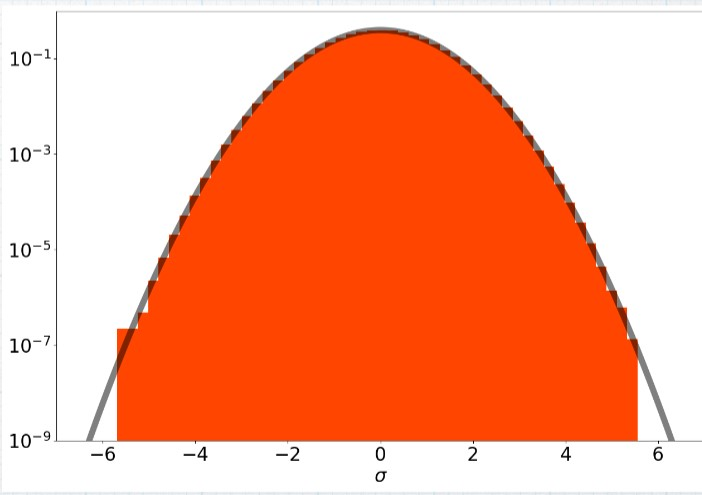

In [88]:
from IPython.display import Image
Image(filename='screenshot.jpg')

In [87]:
sigma = norm.ppf(0.04880121836201301)
print(sigma)

-1.6565897961517237


What we just did here is take the probability that the background noise gave a signal by integrating from 3.02 to infinity in the exponential distribution and use that to find the sigma value in the normal distribution. This is because integrating the normal distribution function from negative infinity to -1.66 (or 1.66 to positive infinity) is the same as integrating the exponential function from 3.02 to infinity. The result of all of this is that, the probability that we measure a value that is at least signal-like or more than 3.02 in the background noise, is 1.66(sigma).

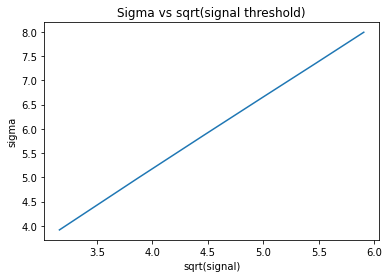

In [90]:
x = np.linspace(10, 1000, 200)
f = norm.ppf(1 - expon.cdf(x))
y = np.abs(f)
plt.title("Sigma vs sqrt(signal threshold)")
plt.xlabel("sqrt(signal)")
plt.ylabel("sigma")

plt.plot(np.sqrt(x), y);

What this is saying is that as the number of 